In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Preprocess
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [6]:
# Build model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - accuracy: 0.9117 - loss: 0.2826 - val_accuracy: 0.9829 - val_loss: 0.0541
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9856 - loss: 0.0449 - val_accuracy: 0.9853 - val_loss: 0.0424
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.9918 - loss: 0.0272 - val_accuracy: 0.9886 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9915 - val_loss: 0.0264
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9904 - val_loss: 0.0337


In [8]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n Final Test Accuracy: {accuracy:.4f}")
print(f"Final Test Loss: {loss:.4f}")

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9880 - loss: 0.0425

 Final Test Accuracy: 0.9904
Final Test Loss: 0.0337
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


 Confusion Matrix:
[[ 975    1    0    1   


 Showing 5 random test images with predicted labels:



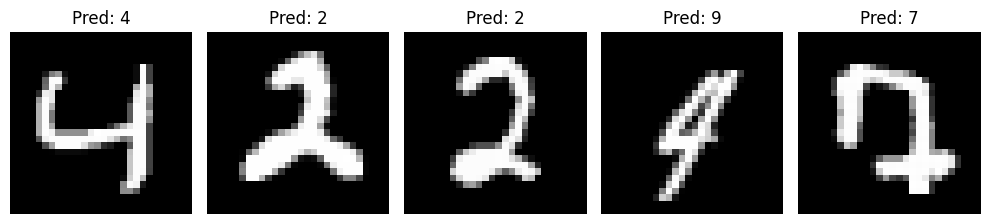

In [9]:
# Show 5 random test images with prediction
print("\n Showing 5 random test images with predicted labels:\n")
plt.figure(figsize=(10, 3))
for i, idx in enumerate(np.random.choice(len(X_test), 5, replace=False)):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()